# Clustering with k-means

## Imports

In [104]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rnd


## Reading and showing dataset

In [100]:
dataset = pd.read_csv('/home/vutaliy/Downloads/dataset_191_wine.csv')
main_attribute = pd.unique(dataset['class'])
classes = dataset['class'].to_numpy()

objects = dataset.iloc[:,1:].to_numpy()
objects = MinMaxScaler().fit_transform(objects)
print(objects.shape)

objects_embedded = TSNE().fit_transform(objects)
print(objects_embedded.shape)


(178, 13)
(178, 2)


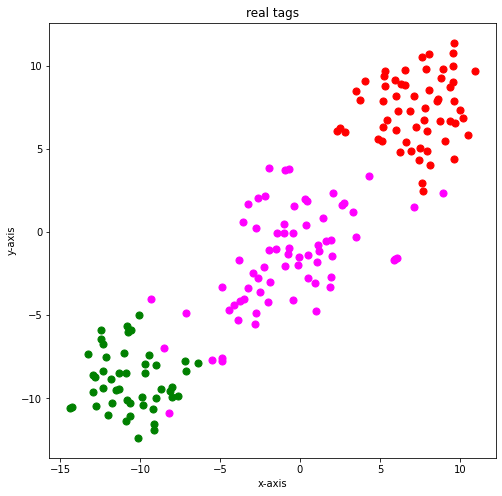

In [101]:
def dif_ds_by_class(X, y, y_dim):
    ans = [[] for _ in range(y_dim)]
    for x_, y_ in zip(X, y):
        ans[y_ - 1].append(x_)

    for i in range(len(ans)):
        ans[i] = np.array(ans[i])
    return np.array(ans)

def gen_scatters(objs_by_cl):
    if (len(objs_by_cl) > 5):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'green', 'blue', 'yellow']
    for ix, o in enumerate(objs_by_cl):
        ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)


objects_by_classes = dif_ds_by_class(objects_embedded, classes, len(main_attribute)) 
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set(xlabel='x-axis', ylabel='y-axis', title='real tags')

gen_scatters(objects_by_classes)

## k-means clustering

In [173]:
def euclidian_distance(vec1, vec2):
    ans = 0
    for v1, v2 in zip(vec1, vec2):
        ans += (v1 - v2) ** 2
    return sqrt(ans)

def diff(vec1, vec2):
    ans = 0
    for v1, v2 in zip(vec1, vec2):
        for vv1, vv2 in zip(v1, v2):
            ans += abs(vv1 - vv2)
    return ans

def mean(vec):
    ans = [0 for _ in range(vec.shape[1])]
    for v in vec:
        ans += v
    return ans / len(vec)

def k_means(X, k=3, max_iters=2000):
    initial_cluster_cord = [[0 for __ in range(X.shape[1])] for _ in range(k)]
    new_cluster_cord = [[rnd.random() for __ in range(X.shape[1])] for _ in range(k)]
    new_cluster_cord.sort()

    # for i in range(len(new_cluster_cord)):
    #     # for j in range(len(new_cluster_cord[i])):
    #     new_cluster_cord[i]
    # new_cluster_cord.sort()    

    cluster_objs = [np.array([[0 for __ in range(X.shape[1])]]) for _ in range(k)]
    cluster_inds = [np.array(0) for _ in range(k)]

    iters = 0
    while diff(initial_cluster_cord, new_cluster_cord) != 0 or max_iters > iters:
        print(iters, diff(initial_cluster_cord, new_cluster_cord))
        iters += 1
        initial_cluster_cord = [ncc.copy() for ncc in new_cluster_cord]

        for i, x in enumerate(X):
            min_dis = float('inf')
            tag = -1
            
            for ix, ncc in enumerate(new_cluster_cord):
                dis = euclidian_distance(x, ncc)
                
                if (dis < min_dis):
                    tag = ix
                    min_dis = dis
            
            cluster_objs[tag] = np.append(cluster_objs[tag], [x], axis=0)
            cluster_inds[tag] = np.append(cluster_inds[tag], i)

        new_cluster_cord = [mean(co) for co in cluster_objs]

        if diff(initial_cluster_cord, new_cluster_cord) == 0 or max_iters == iters: 
            for i in range(len(cluster_objs)):
                cluster_objs[i] = cluster_objs[i][1:,:]
                cluster_inds[i] = cluster_inds[i][1:]

            return cluster_objs, cluster_inds
        cluster_objs = [np.array([[0 for __ in range(X.shape[1])]]) for _ in range(k)]
        cluster_inds = [np.array(0) for _ in range(k)]


def get_preds(clusters, cluster_inds):
    ans = [0] * len(objects)
    for ix, c in enumerate(clusters):
        for _, cli in zip(c, cluster_inds[ix]):
            ans[cli] = ix+1
    return ans 

clusters, cl_inds = k_means(objects)
# print(cl_inds)
preds = get_preds(clusters)
objects_by_clusters = dif_ds_by_class(objects_embedded, preds, len(clusters))
print(preds)

0 20.50487901127597
1 9.6911551217218
2 1.6980066960872384
3 0.26189408365054806
4 0.07200758675454208
[array([ 59,  62,  63,  64,  65,  67,  69,  71,  72,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129]), array([ 60,  61,  68,  70,  83, 118, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 

## Plots for cheking diff between tags

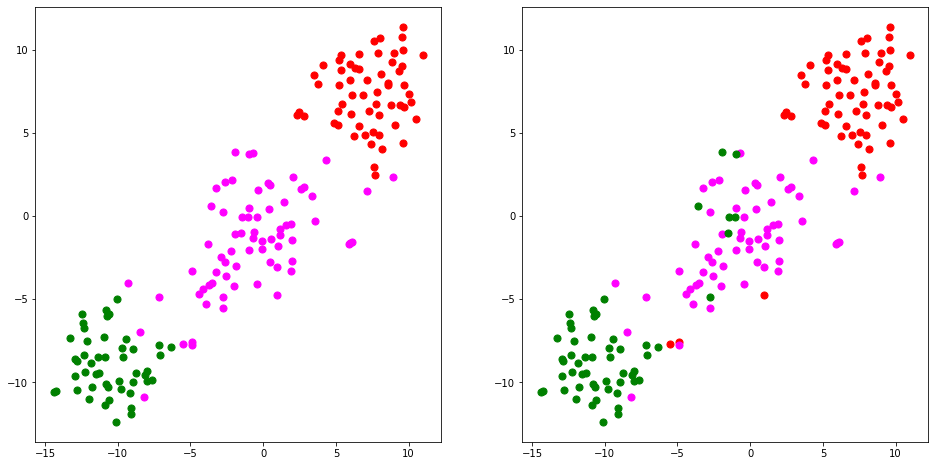

In [150]:
buff = [objects_by_classes, objects_by_clusters]

fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

def gen_new_scatters(objs_by_cl, ax_y, ax_x, ax):
    if (len(objs_by_cl) > 5):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'green', 'blue', 'yellow']
    for ix, o in enumerate(objs_by_cl):
            ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)

for ix, ax in enumerate(axs):
    gen_new_scatters(buff[ix], 0, ix, ax)

plt.show()

In [118]:
confusion_matrix(preds, classes)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


array([[55,  0,  0],
       [ 4, 58,  0],
       [ 0, 13, 48]])

In [123]:
np.append(np.array([0,2]),1)

array([0, 2, 1])

In [138]:
cluster_inds = [np.array(0) for _ in range(5)]
cluster_inds[0] = np.append(cluster_inds[0],1)
cluster_inds

[array([0, 1]), array(0), array(0), array(0), array(0)]